In [1]:
import pandas as pd
reviews = pd.read_csv("winemag-data_first150k.csv", index_col=0)
reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


# Plots de uma variável com Pandas

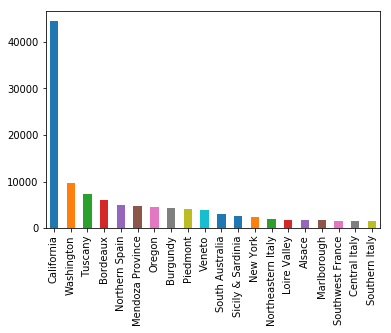

In [3]:
reviews.province.value_counts().head(20).plot.bar()

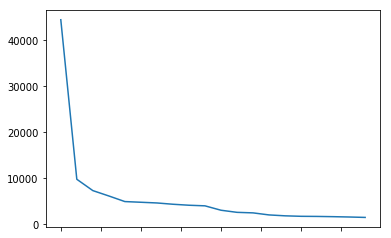

In [10]:
reviews.province.value_counts().head(20).plot.line()

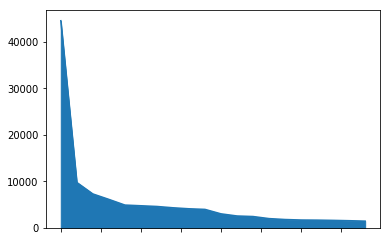

In [11]:
reviews.province.value_counts().head(20).plot.area()

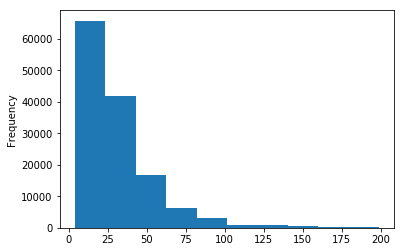

In [12]:
reviews[reviews['price'] < 200]['price'].plot.hist()

# Plots de duas variáveis com Pandas

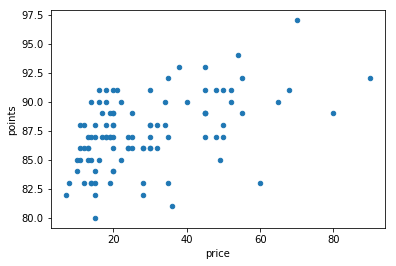

In [7]:

reviews = pd.read_csv("winemag-data_first150k.csv", index_col=0)
reviews[reviews['price'] < 100].sample(100).plot.scatter(x='price', y='points')

**Hexplot**

A hex plot aggregates points in space into hexagons, and then colors those hexagons based on the values within them:

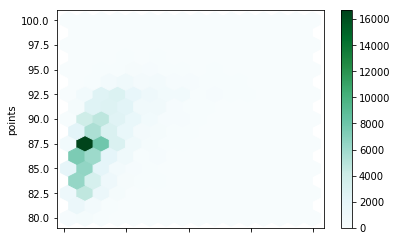

In [12]:
reviews[reviews['price'] < 200].plot.hexbin(x='price', y='points', gridsize=15)

# Plotting com Seabron

In [13]:
import seaborn as sns

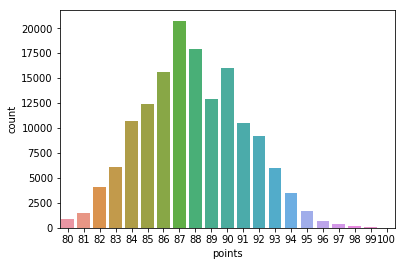

In [14]:
sns.countplot(reviews.points)

C:\Users\igor\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


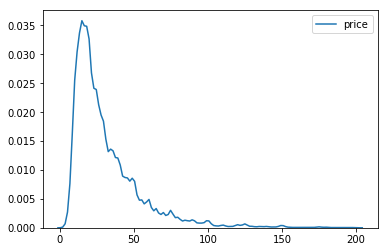

In [15]:
sns.kdeplot(reviews.query('price < 200').price)

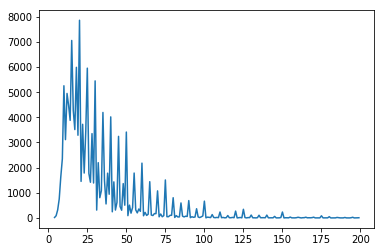

In [16]:
reviews[reviews['price'] < 200]['price'].value_counts().sort_index().plot.line()

Acima é possíve entender que o KDE suaviza os dados

C:\Users\igor\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
C:\Users\igor\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


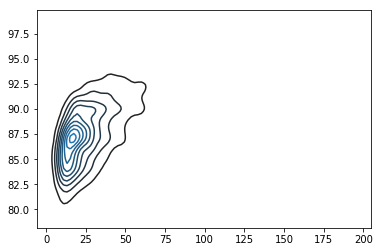

In [17]:
# 2D
sns.kdeplot(reviews[reviews['price'] < 200].loc[:, ['price', 'points']].dropna().sample(5000))

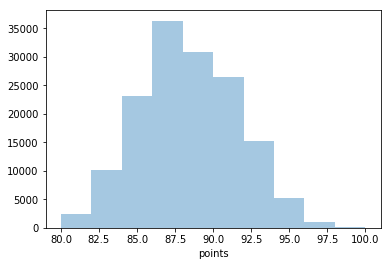

In [18]:
sns.distplot(reviews['points'], bins=10, kde=False)

C:\Users\igor\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


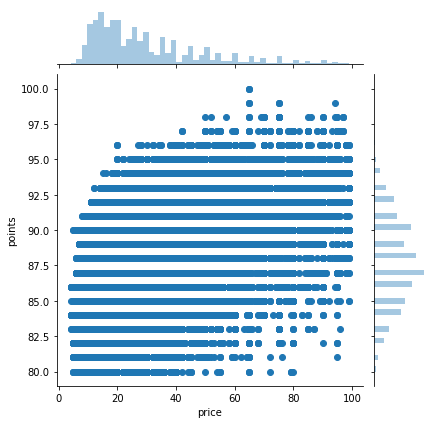

In [19]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100])

C:\Users\igor\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


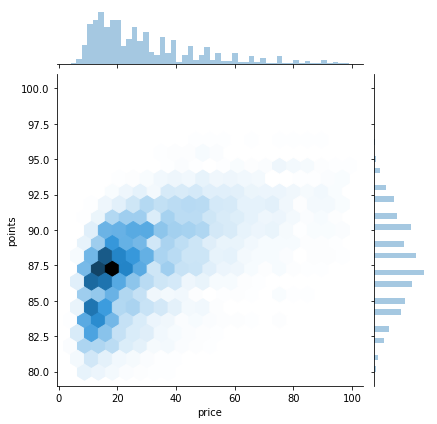

In [20]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100], kind='hex', 
              gridsize=20)

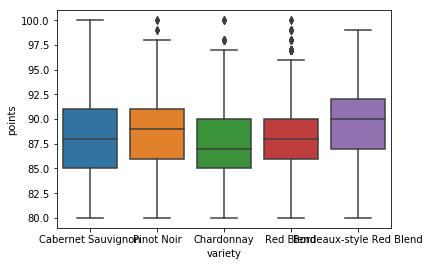

In [21]:
df = reviews[reviews.variety.isin(reviews.variety.value_counts().head(5).index)]

sns.boxplot(
    x='variety',
    y='points',
    data=df
)

The center of the distributions shown above is the "box" in boxplot. The top of the box is the 75th percentile, while the bottom is the 25th percentile. In other words, half of the data is distributed within the box! The green line in the middle is the median.

The other part of the plot, the "whiskers", shows the extent of the points beyond the center of the distribution. Individual circles beyond that are outliers.

This boxplot shows us that although all five wines recieve broadly similar ratings, Bordeaux-style wines tend to be rated a little higher than a Chardonnay.

Boxplots are great for summarizing the shape of many datasets. They also don't have a limit in terms of numeracy: you can place as many boxes in the plot as you feel comfortable squeezing onto the page.

However, they only work for interval variables and nominal variables with a large number of possible values; they assume your data is roughly normally distributed (otherwise their design doesn't make much sense); and they don't carry any information about individual values, only treating the distribution as a whole.

I find the slightly more advanced violinplot to be more visually enticing, in most cases:

C:\Users\igor\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


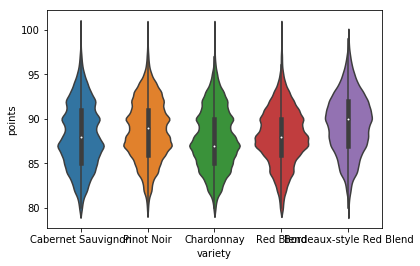

In [22]:
sns.violinplot(
    x='variety',
    y='points',
    data=reviews[reviews.variety.isin(reviews.variety.value_counts()[:5].index)]
)

# Subplots


In [26]:
import matplotlib.pyplot as plt

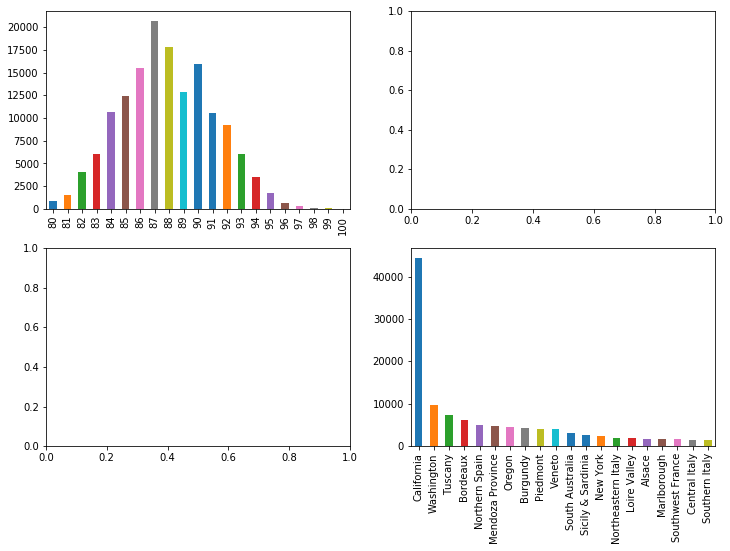

In [28]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

reviews['points'].value_counts().sort_index().plot.bar(
    ax=axarr[0][0]
)

reviews['province'].value_counts().head(20).plot.bar(
    ax=axarr[1][1]
)

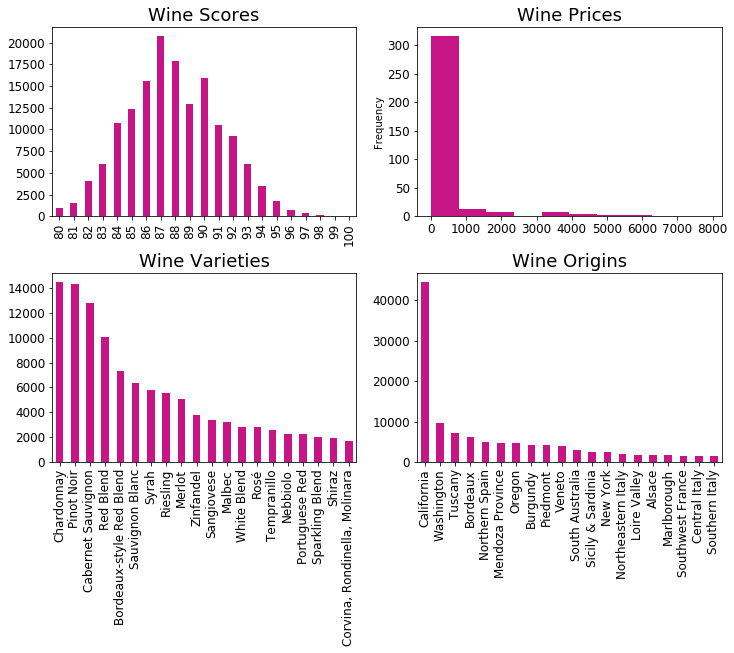

In [29]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

reviews['points'].value_counts().sort_index().plot.bar(
    ax=axarr[0][0], fontsize=12, color='mediumvioletred'
)
axarr[0][0].set_title("Wine Scores", fontsize=18)

reviews['variety'].value_counts().head(20).plot.bar(
    ax=axarr[1][0], fontsize=12, color='mediumvioletred'
)
axarr[1][0].set_title("Wine Varieties", fontsize=18)

reviews['province'].value_counts().head(20).plot.bar(
    ax=axarr[1][1], fontsize=12, color='mediumvioletred'
)
axarr[1][1].set_title("Wine Origins", fontsize=18)

reviews['price'].value_counts().plot.hist(
    ax=axarr[0][1], fontsize=12, color='mediumvioletred'
)
axarr[0][1].set_title("Wine Prices", fontsize=18)

plt.subplots_adjust(hspace=.3)

# Faceting with seaborn

So far in this tutorial we've been plotting data in one (univariate) or two (bivariate) dimensions, and we've learned how plotting in seaborn works. In this section we'll dive deeper into seaborn by exploring faceting.

Faceting is the act of breaking data variables up across multiple subplots, and combining those subplots into a single figure. So instead of one bar chart, we might have, say, four, arranged together in a grid.

In [30]:
footballers = pd.read_csv('FIFA.csv')

C:\Users\igor\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
footballers.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
footballers.Positioning

0        95
1        93
2        90
3        92
4        12
5        91
6        12
7        85
8        79
9        92
10       52
11       84
12       13
13       86
14       79
15       86
16       91
17       28
18       12
19       84
20       11
21       91
22       83
23       89
24       38
25       47
26       48
27       56
28       83
29       10
         ..
17951    13
17952    50
17953    44
17954    44
17955    33
17956    27
17957    38
17958    36
17959    44
17960    36
17961    21
17962    35
17963    30
17964    31
17965    54
17966    28
17967    41
17968    22
17969    43
17970    32
17971    49
17972    44
17973    51
17974    27
17975    39
17976     6
17977    13
17978    46
17979    37
17980    20
Name: Positioning, Length: 17981, dtype: object